# EDA 탐색적 분석_1

In [22]:
#함수 호출
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

#한글 폰트 호출
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
font_location = 'C:\Windows\Fonts\malgun.ttf' # For Windows
#font_location = 'C:/Windows/Fonts/malgunsl.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
#matplotlib.rc('font', family=font_name)
plt.rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

# 자동 사이즈 조정 
%matplotlib inline

In [2]:
#csv 파일 호출
df = pd.read_csv('./data/20200101_seoul_2014_to_2018_crime_cctv_pop_food_sum.csv')
display(df.head(10))
df.info()

,년도,지역,강도,살인,절도,폭력,강간강제추행,살인강간,강도절도폭력,범죄합계,10만명당범죄수,한국인,등록외국인,세대,인구합계,CCTV,10만명당CCTV수,단란주점,유흥주점,단란유흥
0,2014,강남구,37,13,3895,4394,512,525,8326,8851,1534,571509,5359,234324,576868,430,74,328,276,604
1,2014,강동구,10,5,2425,2804,148,153,5239,5392,1113,479586,4605,186239,484191,59,12,105,151,256
2,2014,강북구,21,6,1494,2320,189,195,3835,4030,1186,336363,3308,141139,339671,74,21,129,74,203
3,2014,강서구,9,8,2341,2717,214,222,5067,5289,907,576574,6331,230553,582906,230,39,169,114,283
4,2014,관악구,25,7,3029,3359,361,368,6413,6781,1270,515688,18120,248703,533809,487,91,100,228,328
5,2014,광진구,16,8,3167,2828,249,257,6011,6268,1651,365993,13493,159134,379486,87,22,89,19,108
6,2014,구로구,14,3,2377,2743,252,255,5134,5389,1179,427022,29736,172682,456758,187,40,100,40,140
7,2014,금천구,9,7,1552,2112,162,169,3673,3842,1488,239510,18669,104002,258180,101,39,84,60,144
8,2014,노원구,8,5,2404,2722,173,178,5134,5312,901,585599,3474,221580,589074,80,13,57,28,85
9,2014,도봉구,11,6,1350,1585,172,178,2946,3124,873,355829,2003,137382,357832,185,51,56,21,77


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 20 columns):
년도            125 non-null int64
지역            125 non-null object
강도            125 non-null int64
살인            125 non-null int64
절도            125 non-null int64
폭력            125 non-null int64
강간강제추행        125 non-null int64
살인강간          125 non-null int64
강도절도폭력        125 non-null int64
범죄합계          125 non-null int64
10만명당범죄수      125 non-null int64
한국인           125 non-null int64
등록외국인         125 non-null int64
세대            125 non-null int64
인구합계          125 non-null int64
CCTV          125 non-null int64
10만명당CCTV수    125 non-null int64
단란주점          125 non-null int64
유흥주점          125 non-null int64
단란유흥          125 non-null int64
dtypes: int64(19), object(1)
memory usage: 19.6+ KB


In [3]:
#서울지역 리스트 생성
seoul_area = list(set(df['지역']))
print(seoul_area)
df[df['지역'] == '중구']

#자치구 별로 csv파일로 추출
for i in seoul_area:
    df[df['지역'] == i].to_csv('./data/seoul_list/'+i+'.csv',encoding='cp949')

['서대문구', '강남구', '강동구', '동작구', '강서구', '도봉구', '중구', '은평구', '관악구', '성북구', '중랑구', '영등포구', '구로구', '금천구', '종로구', '동대문구', '광진구', '성동구', '용산구', '양천구', '송파구', '강북구', '노원구', '마포구', '서초구']


In [4]:
# #구별로 그래프 추출
# for i in seoul_area:
#     #csv 파일 호출
#     gdf = pd.read_csv('./data/seoul_list/'+i+'.csv', encoding='cp949',index_col='년도')
#     fig = plt.figure(figsize=(20,10))
#     ax1 = fig.add_subplot(2, 3, 1)
#     ax2 = fig.add_subplot(2, 3, 2)
#     ax3 = fig.add_subplot(2, 3, 3)
#     ax4 = fig.add_subplot(2, 3, 4)
#     ax5 = fig.add_subplot(2, 3, 5)
#     ax6 = fig.add_subplot(2, 3, 6)


#     sns.barplot(x='CCTV', y='강간강제추행', data=gdf, ax= ax1)
#     sns.barplot(x='CCTV', y='강도', data=gdf, ax= ax2)
#     sns.barplot(x='CCTV', y='절도', data=gdf, ax= ax3)
#     sns.barplot(x='CCTV', y='살인', data=gdf, ax= ax4)
#     sns.barplot(x='CCTV', y='폭력', data=gdf, ax= ax5)
#     sns.barplot(x='CCTV', y='범죄합계', data=gdf, ax= ax6)

#     plt.savefig('./data/seoul_pic/'+i+'.png')
    
    

## 1.강남구 분석

In [5]:
gn_df = pd.read_csv('./data/seoul_list/강남구.csv', encoding='cp949',index_col='년도')
gn_df.columns

Index(['Unnamed: 0', '지역', '강도', '살인', '절도', '폭력', '강간강제추행', '살인강간', '강도절도폭력',
       '범죄합계', '10만명당범죄수', '한국인', '등록외국인', '세대', '인구합계', 'CCTV', '10만명당CCTV수',
       '단란주점', '유흥주점', '단란유흥'],
      dtype='object')

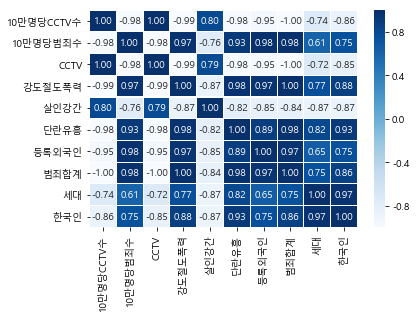

In [6]:
gn_df_corr  = gn_df[['10만명당CCTV수', '10만명당범죄수', 'CCTV', '강도절도폭력','살인강간' , '단란유흥',
     '등록외국인', '범죄합계', '세대', '한국인']].corr()
hm = sns.heatmap(data = gn_df_corr, annot=True, 
fmt = '.2f', linewidths=.1, cmap='Blues')
hm.set_ylim(10.0,0.0)
plt.savefig('./data/seoul_강남구_corr_pic.png')

In [7]:
gn_df_corr['범죄합계']

10만명당CCTV수   -0.997009
10만명당범죄수      0.981234
CCTV         -0.996909
강도절도폭력        0.998399
살인강간         -0.838442
단란유흥          0.977826
등록외국인         0.965407
범죄합계          1.000000
세대            0.746435
한국인           0.861042
Name: 범죄합계, dtype: float64

### 각 컬럼별 지역순위

In [8]:
order_df = pd.read_csv('./data/20200101_seoul_2014_to_2018_crime_cctv_pop_food_sum.csv', encoding='utf-8')
#ddf_2018 = ddf[ddf['지역']=='강남구']
order_df = order_df[order_df['년도'] == 2018]

In [9]:
# #인구합계
# display(order_df[['지역','인구합계']].sort_values(by=['인구합계'], axis=0, ascending=False).head(5))

# #CCTV
# display(order_df[['지역','CCTV']].sort_values(by=['CCTV'], axis=0, ascending=False).head(5))

# #범죄 합
# display(order_df[['지역','범죄합계']].sort_values(by=['범죄합계'], axis=0, ascending=False).head(5))

# #살인강간
# display(order_df[['지역','살인강간']].sort_values(by=['살인강간'], axis=0, ascending=False).head(5))

# #강절폭
# display(order_df[['지역','강도절도폭력']].sort_values(by=['강도절도폭력'], axis=0, ascending=False).head(5))

# #등록외국인수
# display(order_df[['지역','등록외국인']].sort_values(by=['등록외국인'], axis=0, ascending=False).head(5))

# #10만명당범죄수
# display(order_df[['지역','10만명당범죄수']].sort_values(by=['10만명당범죄수'], axis=0, ascending=False).head(5))

# #10만명당CCTV수
# display(order_df[['지역','10만명당CCTV수']].sort_values(by=['10만명당CCTV수'], axis=0, ascending=False).head(5))

# #단란유흥수
# display(order_df[['지역','단란유흥']].sort_values(by=['단란유흥'], axis=0, ascending=False).head(5))

## 그래프로 보기 2

In [23]:
graph_df = pd.read_csv('./data/20200101_seoul_2014_to_2018_crime_cctv_pop_food_sum.csv', encoding='utf-8')

In [24]:
graph_df = graph_df.pivot_table(index=['년도'],aggfunc=np.sum)
graph_df.reset_index(level='년도', inplace=True)

graph_df

,년도,10만명당CCTV수,10만명당범죄수,CCTV,강간강제추행,강도,강도절도폭력,단란유흥,단란주점,등록외국인,범죄합계,살인,살인강간,세대,유흥주점,인구합계,절도,폭력,한국인
0,2014,1553,34779,6248,5462,343,125054,5189,2919,257047,130674,158,5620,4192293,2270,10381261,59393,65318,10124202
1,2015,3070,33838,11920,5449,276,120789,5073,2861,272617,126401,163,5612,4196408,2212,10336877,55307,65206,10064252
2,2016,4827,31982,18604,6002,262,111689,4923,2786,272481,117839,148,6150,4192351,2137,10246055,46857,64570,9973564
3,2017,6960,29373,26090,6963,169,100730,4888,2752,267181,107835,142,7105,4213216,2136,10164740,41162,59399,9897549
4,2018,9294,27822,34827,6412,143,95393,4680,2614,276991,101948,143,6555,4249252,2066,10079887,39175,56075,9802883


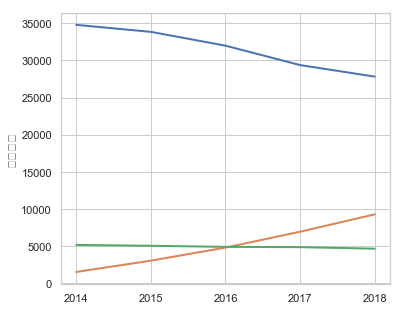

In [25]:
year_col = ['2014','2015','2016','2017','2018']

# 10만명당 CCTV, 단란유흥, 10만명당 범죄수
fig = plt.figure(figsize=(20,5))
sns.set(style="whitegrid")

ax1 = fig.add_subplot(1, 3, 1)
#ax2 = fig.add_subplot(1, 3, 2)
#ax3 = fig.add_subplot(1, 3, 3)

sns.lineplot(x=year_col , y=graph_df['10만명당범죄수'], palette="tab10", linewidth=2 ,ax=ax1)
sns.lineplot(x=year_col, y=graph_df['10만명당CCTV수'], palette="tab10", linewidth=2,ax=ax1)
sns.lineplot(x=year_col, y=graph_df['단란유흥'], palette="tab10", linewidth=2,ax=ax1)
# sns.lineplot(x=year_col , y=graph_df['10만명당범죄수'], palette="tab10", linewidth=2 ,ax=ax1)
# sns.lineplot(x=year_col, y=graph_df['10만명당CCTV수'], palette="tab10", linewidth=2,ax=ax2)
# sns.lineplot(x=year_col, y=graph_df['단란유흥'], palette="tab10", linewidth=2,ax=ax3)


plt.show()
plt.close()

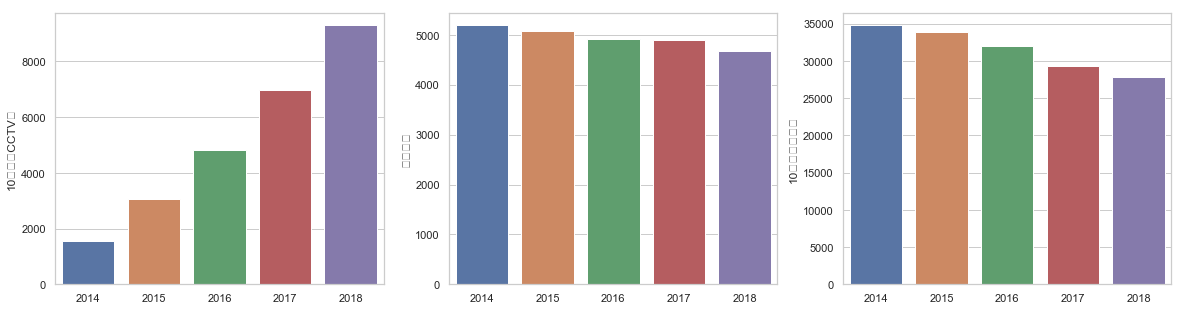

In [26]:
# 10만명당 CCTV, 단란유흥, 10만명당 범죄수
fig = plt.figure(figsize=(20,5))
sns.set(style="whitegrid")

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# sns.lineplot(x="fff" ,y="10만명당CCTV수" , data=ddf['10만명당범죄수'], palette="tab10", linewidth=2 ,ax=ax1)
# sns.lineplot(data=ddf['10만명당CCTV수'], palette="tab10", linewidth=2,ax=ax2)
# sns.lineplot(data=ddf['단란유흥'], palette="tab10", linewidth=2,ax=ax3)

sns.barplot(x=year_col , y=graph_df['10만명당CCTV수'] , ax=ax1)
sns.barplot(x=year_col , y=graph_df['단란유흥'] , ax=ax2)
sns.barplot(x=year_col , y=graph_df['10만명당범죄수'] , ax=ax3)



plt.show()
plt.close()

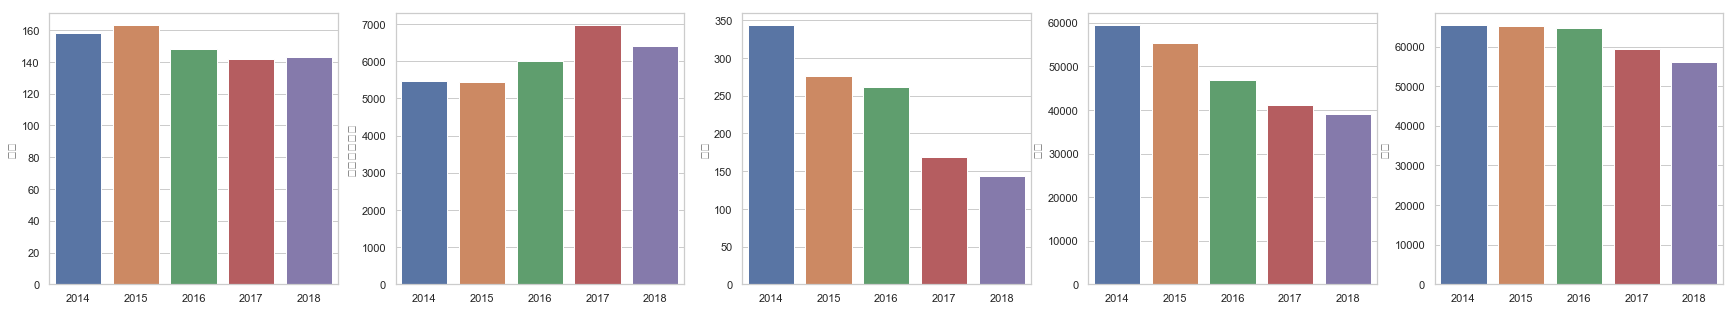

In [27]:
#5대 범죄
fig = plt.figure(figsize=(30,5))

sns.set(style="whitegrid")

ax1 = fig.add_subplot(1, 5, 1)
ax2 = fig.add_subplot(1, 5, 2)
ax3 = fig.add_subplot(1, 5, 3)
ax4 = fig.add_subplot(1, 5, 4)
ax5 = fig.add_subplot(1, 5, 5)

# sns.lineplot(x="fff" ,y="10만명당CCTV수" , data=ddf['10만명당범죄수'], palette="tab10", linewidth=2 ,ax=ax1)
# sns.lineplot(data=ddf['10만명당CCTV수'], palette="tab10", linewidth=2,ax=ax2)
# sns.lineplot(data=ddf['단란유흥'], palette="tab10", linewidth=2,ax=ax3)

sns.barplot(x=year_col , y=graph_df['살인'] , ax=ax1)
sns.barplot(x=year_col , y=graph_df['강간강제추행'] , ax=ax2)
sns.barplot(x=year_col , y=graph_df['강도'] , ax=ax3)
sns.barplot(x=year_col , y=graph_df['절도'] , ax=ax4)
sns.barplot(x=year_col , y=graph_df['폭력'] , ax=ax5)



plt.show()
plt.close()

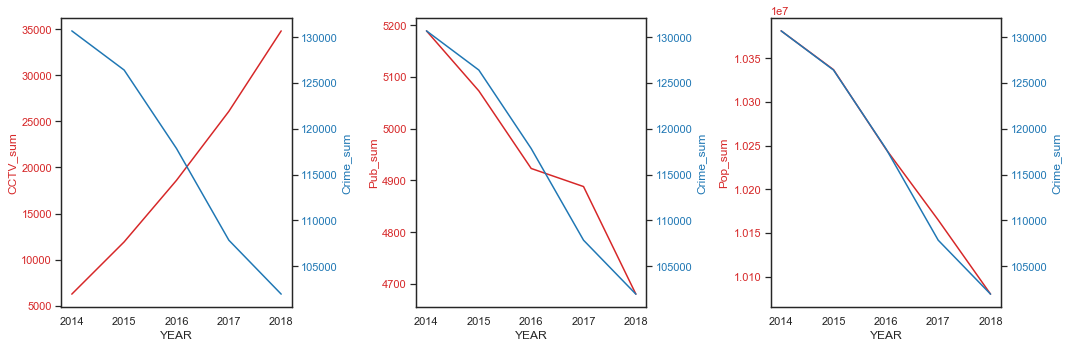

In [28]:
#plt.rcParams['font.family'] = 'Malgun Gothic'
#5대 범죄
fig = plt.figure(figsize=(15,5))

sns.set(style="white")

ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

year_col = ['2014','2015','2016','2017','2018']


color = 'tab:red'
ax1.set_xlabel('YEAR')
ax1.set_ylabel('CCTV_sum', color=color)
ax1.plot(year_col, graph_df['CCTV'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1_t = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax1_t.set_ylabel('Crime_sum', color=color)  # we already handled the x-label with ax1
ax1_t.plot(year_col, graph_df['범죄합계'], color=color)
ax1_t.tick_params(axis='y', labelcolor=color)


color = 'tab:red'
ax2.set_xlabel('YEAR')
ax2.set_ylabel('Pub_sum', color=color)
ax2.plot(year_col, graph_df['단란유흥'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax2_t = ax2.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2_t.set_ylabel('Crime_sum', color=color)  # we already handled the x-label with ax1
ax2_t.plot(year_col, graph_df['범죄합계'], color=color)
ax2_t.tick_params(axis='y', labelcolor=color)


color = 'tab:red'
ax3.set_xlabel('YEAR')
ax3.set_ylabel('Pop_sum', color=color)
ax3.plot(year_col, graph_df['인구합계'], color=color)
ax3.tick_params(axis='y', labelcolor=color)

ax3_t = ax3.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax3_t.set_ylabel('Crime_sum', color=color)  # we already handled the x-label with ax1
ax3_t.plot(year_col, graph_df['범죄합계'], color=color)
ax3_t.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()